In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir("E:\Fall 2018\Python\Practice\BigMartSales")

In [3]:
%pwd

'E:\\Fall 2018\\Python\\Practice\\BigMartSales'

In [4]:
train = pd.read_csv("Train.csv", sep = ',')

In [5]:
test = pd.read_csv("Test.csv", sep = ',')

In [6]:
train.head(2), test.head(2)

(  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
 0           FDA15         9.30          Low Fat         0.016047        Dairy   
 1           DRC01         5.92          Regular         0.019278  Soft Drinks   
 
    Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
 0  249.8092            OUT049                       1999      Medium   
 1   48.2692            OUT018                       2009      Medium   
 
   Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
 0               Tier 1  Supermarket Type1          3735.1380  
 1               Tier 3  Supermarket Type2           443.4228  ,
   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
 0           FDW58        20.75          Low Fat         0.007565  Snack Foods   
 1           FDW14         8.30              reg         0.038428        Dairy   
 
    Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
 0  107.8622     

In [7]:
type(train)

pandas.core.frame.DataFrame

In [8]:
train['Source'] = 'Train'

In [9]:
test['Source'] = 'Test'

In [10]:
data = pd.concat([train,test], ignore_index = True)

In [11]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train


In [12]:
data.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train


In [13]:
train.shape

(8523, 13)

In [14]:
data.shape

(14204, 13)

In [15]:
test.shape

(5681, 12)

In [16]:
print(data.columns)

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Source'],
      dtype='object')


In [17]:
data.info

<bound method DataFrame.info of       Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0              Low Fat           FDA15  249.8092          3735.1380   
1              Regular           DRC01   48.2692           443.4228   
2              Low Fat           FDN15  141.6180          2097.2700   
3              Regular           FDX07  182.0950           732.3800   
4              Low Fat           NCD19   53.8614           994.7052   
5              Regular           FDP36   51.4008           556.6088   
6              Regular           FDO10   57.6588           343.5528   
7              Low Fat           FDP10  107.7622          4022.7636   
8              Regular           FDH17   96.9726          1076.5986   
9              Regular           FDU28  187.8214          4710.5350   
10             Low Fat           FDY07   45.5402          1516.0266   
11             Regular           FDA03  144.1102          2187.1530   
12             Regular           FDX32  145.4

In [18]:
data.loc[data['Source'] == 'Test', ['Item_MRP', 'Item_Outlet_Sales']].head()

,Item_MRP,Item_Outlet_Sales
8523,107.8622,NaN
8524,87.3198,NaN
8525,241.7538,NaN
8526,155.0340,NaN
8527,234.2300,NaN


In [19]:
data.isna().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Source                          0
dtype: int64

In [20]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
Source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [22]:
numeric_features = data.select_dtypes(include = [np.number])
numeric_features.dtypes

Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
dtype: object

In [23]:
corr = numeric_features.corr()
corr

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
Item_MRP,1.000000,0.567574,-0.006351,0.036236,0.000141
Item_Outlet_Sales,0.567574,1.000000,-0.128625,0.014123,-0.049135
Item_Visibility,-0.006351,-0.128625,1.000000,-0.015901,-0.083678
Item_Weight,0.036236,0.014123,-0.015901,1.000000,0.000645
Outlet_Establishment_Year,0.000141,-0.049135,-0.083678,0.000645,1.000000


In [24]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


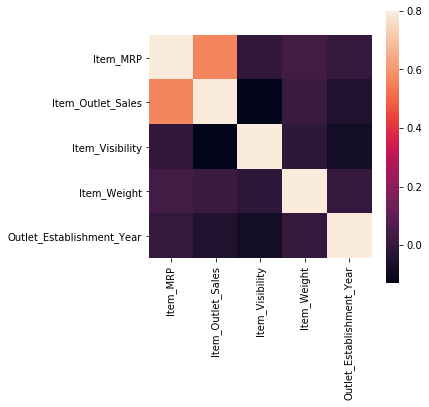

In [25]:
#correlation matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, vmax=.8, square=True)

In [26]:
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

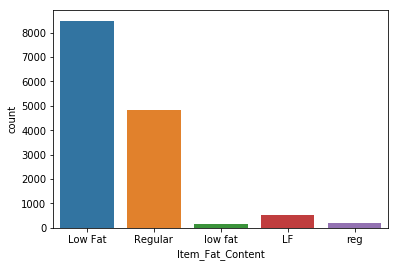

In [27]:
sns.countplot(data.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

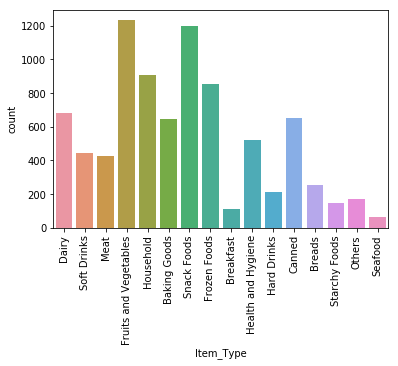

In [28]:
sns.countplot(train.Item_Type)
plt.xticks(rotation = 90)


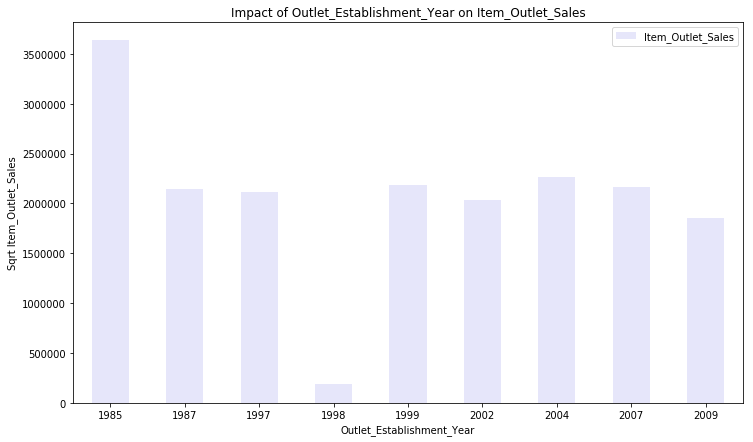

In [29]:
Outlet_Establishment_Year_pivot= data.pivot_table(index = 'Outlet_Establishment_Year', values = 'Item_Outlet_Sales', aggfunc = np.sum)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='lavender',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [30]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train


In [31]:
mean = data['Item_Weight'].mean()
data['Item_Weight'].fillna(mean, inplace = True)

In [32]:
mode = data['Outlet_Size'].mode()
data['Outlet_Size'].fillna(mode[0], inplace = True)

In [33]:
data.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace = True)


In [34]:
#build a model
train = data[data['Source']=='Train']

In [35]:
test = data[data['Source'] == 'Test']

In [36]:
train.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source
0,Low Fat,249.8092,3735.1380,Dairy,0.016047,9.30,1999,Tier 1,Medium,Supermarket Type1,Train
1,Regular,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,141.6180,2097.2700,Meat,0.016760,17.50,1999,Tier 1,Medium,Supermarket Type1,Train
3,Regular,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,Tier 3,Medium,Grocery Store,Train
4,Low Fat,53.8614,994.7052,Household,0.000000,8.93,1987,Tier 3,High,Supermarket Type1,Train


In [37]:
test.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source
8523,Low Fat,107.8622,NaN,Snack Foods,0.007565,20.750000,1999,Tier 1,Medium,Supermarket Type1,Test
8524,reg,87.3198,NaN,Dairy,0.038428,8.300000,2007,Tier 2,Medium,Supermarket Type1,Test
8525,Low Fat,241.7538,NaN,Others,0.099575,14.600000,1998,Tier 3,Medium,Grocery Store,Test
8526,Low Fat,155.0340,NaN,Snack Foods,0.015388,7.315000,2007,Tier 2,Medium,Supermarket Type1,Test
8527,Regular,234.2300,NaN,Dairy,0.118599,12.792854,1985,Tier 3,Medium,Supermarket Type3,Test


In [38]:
data.shape

(14204, 11)

In [39]:
test.shape

(5681, 11)

In [40]:
train.shape

(8523, 11)

In [41]:
data.Source.isnull().sum()

0

In [42]:
data.isna().sum()

Item_Fat_Content                0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
Source                          0
dtype: int64

In [43]:
#lets take the train dataset and biuld model and predictions. create train, test from train dataset

from sklearn.model_selection import train_test_split

new_train, new_validation = train_test_split(train, test_size = 0.25)

In [44]:
#X, y train and test from the above datasets
x_train = new_train.drop('Item_Outlet_Sales', axis = 1)
y_train = new_train['Item_Outlet_Sales']

x_validation = new_validation.drop('Item_Outlet_Sales', axis=1)
y_validation = new_validation['Item_Outlet_Sales']

In [45]:
x_validation = pd.get_dummies(x_validation)
x_train = pd.get_dummies(x_train)

In [46]:
type(y_train)

pandas.core.series.Series

In [47]:
y_train[:10]

7260    2972.1312
4085    2120.5730
1840    1037.3164
2763    3968.1680
5349     282.2992
3257     890.8404
7083     198.4084
6385    3739.1328
7039    4402.9354
7042    1398.1800
Name: Item_Outlet_Sales, dtype: float64

In [48]:
type(y_validation)

pandas.core.series.Series

In [49]:
y_validation[:10]

2462    1682.4766
4753    3793.7284
2425    4442.2176
4542    3835.0080
3587     986.7156
4991    8508.9240
7864    6471.5760
7574    4291.7468
7761    1403.5064
3310     284.9624
Name: Item_Outlet_Sales, dtype: float64

In [50]:
#scale the features so that they have equal weightage 
#fit and transform to uniform scaling of features between 0 and 1 to avoid weightage difference in features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_validation_scaled = scaler.fit_transform(x_validation)
x_validation = pd.DataFrame(x_validation_scaled)


C:\Users\nsund\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\nsund\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [51]:
#find the error at different k values
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

#set k value and find the cost of model from sklearn import neighbors from sklearn.metrics import mean_squared_error from math import sqrt

error_cal = []
for k in range(50): 
    k=k+1

    model = neighbors.KNeighborsRegressor(n_neighbors=k)

#fit the train dataset
    model.fit(x_train, y_train)

#test the model by making predictions on the test dataset
    predicted = model.predict(x_validation)

#Calculate error metric of RMSE by comparing the actuals vs predicted
    error = sqrt(mean_squared_error(y_validation, predicted))
    error_cal.append(error)

#look at the error where it is less at what k value
    print('{} is the Error for when the k-value is {}'.format(error, k))

1631.4462458982098 is the Error for when the k-value is 1
1424.107887869491 is the Error for when the k-value is 2
1345.8653197284002 is the Error for when the k-value is 3
1319.7671866870835 is the Error for when the k-value is 4
1303.1847884548479 is the Error for when the k-value is 5
1284.0502469409905 is the Error for when the k-value is 6
1270.6282138194822 is the Error for when the k-value is 7
1275.7600935680196 is the Error for when the k-value is 8
1271.1228176495179 is the Error for when the k-value is 9
1269.6765316748094 is the Error for when the k-value is 10
1268.1980004637946 is the Error for when the k-value is 11
1270.6556594690983 is the Error for when the k-value is 12
1275.944722463209 is the Error for when the k-value is 13
1278.801257954653 is the Error for when the k-value is 14
1284.4980838910562 is the Error for when the k-value is 15
1292.6428503906193 is the Error for when the k-value is 16
1297.4637550698228 is the Error for when the k-value is 17
1303.6866

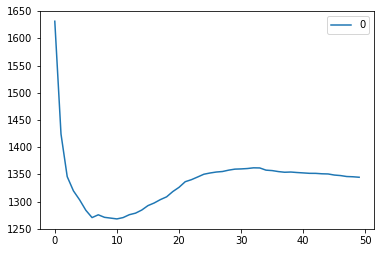

In [52]:
#Optimal k-value is known by plotting rmse(error) Vs k
pd.DataFrame(error_cal).plot()

In [53]:
#Another method to find the good k-value is by grid search CV
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [4,5,6,7,8,9,10]}

knn1 = neighbors.KNeighborsClassifier()

model1 = GridSearchCV(knn1, params, cv=5)
model1.fit(x_train, y_train)
model1.best_params_

C:\Users\nsund\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

From the above graph it clearly shows the values became steady between k values of 7-9

In [ ]:
#now perform the prediction on the test dataset
test

In [ ]:
test.isna().sum()

In [ ]:
test.shape

In [ ]:
test = test.iloc[:, [0,1,3,4,5,6,7,8,9,10]]
test = pd.DataFrame(test)

In [ ]:
test.head()

In [ ]:
test = pd.get_dummies(test)

In [ ]:
test.head()

In [ ]:
#scale the test dataset features
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

#make the prediction on the test dataset by using the model which we built above
predict = model.predict(test)

In [ ]:
predict

Pros of KNN
K-NN does not explicitly build any model, it simply tags the new data entry based learning from historical data. New data entry would be tagged with majority class in the nearest neighbor.
It constantly evolves: Given it’s an instance-based learning; k-NN is a memory-based approach. The classifier immediately adapts as we collect new training data. It allows the algorithm to respond quickly to changes in the input during real-time use.

Cons of KNN
K-NN needs homogeneous features: If you decide to build k-NN using a common distance, like Euclidean or Manhattan distances, it is completely necessary that features have the same scale, since absolute differences in features weight the same.
Optimal number of neighbors: One of the biggest issues with K-NN is to choose the optimal number of neighbors to be consider while classifying the new data entry
Outlier sensitivity: K-NN algorithm is very sensitive to outliers as it simply chose the neighbors based on distance criteria.
Missing Value treatment: K-NN inherently has no capability of dealing with missing value problem.

Applications of KNN:
some concrete examples of k-NN search:

If you’re searching for semantically similar documents (i.e., documents containing similar topics), this is referred to as Concept Search.

The biggest use case of k-NN search might be Recommender Systems.
This applies to recommending products, recommending media to consume, or even ‘recommending’ advertisements to display to a user!

It can also used for k-NN classification, in the right kind of application. k-NN isn’t as sexy as a neural network or an SVM, and generally runs slower and has lower accuracy than those approaches, but it’s got some nice practical qualities. It’s easy to train (because there’s no training :-P), easy to use, and it’s easy to understand the results. I would bet that k-NN classification is used more in the industry than an academic might think (I’ll admit that I tend to look down my nose at k-NN classification).

Here’s at least one concrete example I can give you:

Herta Security uses deep learning algorithms to generate feature vectors representing people’s faces. They then use k-NN to identify a person by compare the face to their watchlist. The reason? k-NN is good enough and it’d be impractical to train a separate classifier for each person on the watchlist.